In [4]:
## Target Guided Ordinal Encoding

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('titanic.csv',usecols = ['Cabin','Survived'])

In [7]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [8]:
df.Cabin.fillna('Missing',inplace = True)

In [9]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [10]:
df.Cabin.isnull().sum()

0

In [11]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [12]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [13]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [14]:
df.groupby('Cabin')['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [15]:
df.groupby('Cabin')['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [16]:
ordinal_labels = df.groupby('Cabin')['Survived'].mean().sort_values().index

In [17]:
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [18]:
ordinal_labels2 = { k:i for i,k in enumerate (ordinal_labels,0)  }

In [19]:
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [20]:
ordinal_labels2 = { k:i for i,k in enumerate (ordinal_labels)  }

In [21]:
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [22]:
df['Cabin_ordinal_labels'] = df.Cabin.map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


##### Mean Encoding

In [23]:
mean_ordinal = df.groupby("Cabin")['Survived'].mean().to_dict()
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [24]:
df['Mean_ordinal_encoded']  =  df.Cabin.map(mean_ordinal)

In [25]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels,Mean_ordinal_encoded
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


In [26]:
mean = df.groupby('Cabin')['Survived'].mean().to_dict()

In [27]:
mean

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [28]:
df['Mean'] = df.Cabin.map(mean)

In [29]:
df

,Survived,Cabin,Cabin_ordinal_labels,Mean_ordinal_encoded,Mean
0,0,M,1,0.299854,0.299854
1,1,C,4,0.593220,0.593220
2,1,M,1,0.299854,0.299854
3,1,C,4,0.593220,0.593220
4,0,M,1,0.299854,0.299854
...,...,...,...,...,...
886,0,M,1,0.299854,0.299854
887,1,B,6,0.744681,0.744681
888,0,M,1,0.299854,0.299854
889,1,C,4,0.593220,0.593220


#### Probability Ratio Encoding

In [30]:
data = pd.read_csv("titanic.csv",usecols = ['Cabin','Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [31]:
data.fillna('Missing',inplace= True)

In [32]:
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [33]:
data.Cabin.unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [34]:
len(data.Cabin.unique())

148

In [35]:
data.Cabin = data.Cabin.astype(str).str[0]

In [36]:
print(data.Cabin.unique())
print(len(data.Cabin.unique()))

['M' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
9


In [37]:
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [38]:
prob = data.groupby('Cabin')['Survived'].mean()
prob

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [39]:
prob = pd.DataFrame(prob)
prob

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [40]:
prob["Died"] = 1 - prob.Survived

In [41]:
prob

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


<Axes: xlabel='Cabin'>

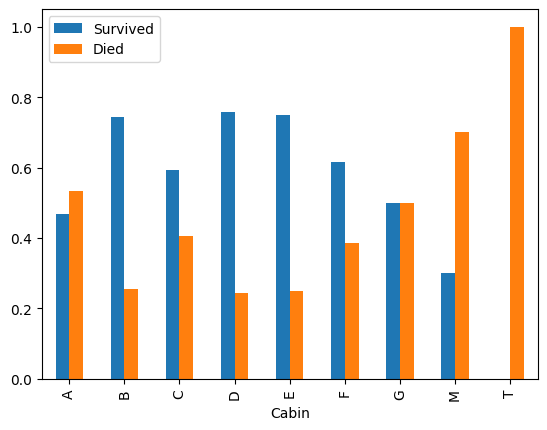

In [42]:
prob.plot.bar()

In [43]:
prob['Probability_Ratio'] = prob.Survived/prob.Died

In [44]:
prob.head()

,Survived,Died,Probability_Ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [45]:
prob_encoded = prob.Probability_Ratio.to_dict()

In [46]:
prob_encoded

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [47]:
prob['Cabin'] = df['Cabin']

In [48]:
pd.DataFrame(df['Cabin'])

,Cabin
0,M
1,C
2,M
3,C
4,M
...,...
886,M
887,B
888,M
889,C


In [49]:
prob['Cabin_En_pR'] = df.Cabin.map(prob_encoded)

In [50]:
df

,Survived,Cabin,Cabin_ordinal_labels,Mean_ordinal_encoded,Mean
0,0,M,1,0.299854,0.299854
1,1,C,4,0.593220,0.593220
2,1,M,1,0.299854,0.299854
3,1,C,4,0.593220,0.593220
4,0,M,1,0.299854,0.299854
...,...,...,...,...,...
886,0,M,1,0.299854,0.299854
887,1,B,6,0.744681,0.744681
888,0,M,1,0.299854,0.299854
889,1,C,4,0.593220,0.593220


In [51]:
prob = prob.drop('Cabin_En_pR',axis = 1)

In [52]:
prob

,Survived,Died,Probability_Ratio,Cabin
Cabin,,,,
A,0.466667,0.533333,0.875000,NaN
B,0.744681,0.255319,2.916667,NaN
C,0.593220,0.406780,1.458333,NaN
D,0.757576,0.242424,3.125000,NaN
E,0.750000,0.250000,3.000000,NaN
F,0.615385,0.384615,1.600000,NaN
G,0.500000,0.500000,1.000000,NaN
M,0.299854,0.700146,0.428274,NaN
T,0.000000,1.000000,0.000000,NaN
